The dataset has been shared by a spotify user. I found it in Kaggle. 

The user has created 2 playlists on Spotify. Both contain around 1000 songs. One with songs, he likes and the other with songs he doesn't like. 

He made sure to vary the styles of music in the 2 playlists. 

Objectif : If, as he indicates, his musical tastes are eclectic, the data set therefore seems interesting for studying the prediction that a song might like him by studying the criteria of the songs.

# Import librairies

In [268]:
#manipulation data
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#access to directory, files
import os

#preprocessing normalisation for modelling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#preprocessing feature selection for modelling
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA

#split dataframe for modelling
from sklearn.model_selection import train_test_split

#algorithm for modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#metrics for study the performance of modelling
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score


# Manipulating Dataset

In [167]:
pwd

'/Users/tatiana/ironhack/ML_Prediction_Music/main'

In [168]:
url='/Users/tatiana/ironhack/Spotify_Pred/data/data.csv'#1 csv file with all songs

In [169]:
df=pd.read_csv(url)
df.head(15)

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0            0       0.01020         0.833       204600   0.434   
1            1       0.19900         0.743       326933   0.359   
2            2       0.03440         0.838       185707   0.412   
3            3       0.60400         0.494       199413   0.338   
4            4       0.18000         0.678       392893   0.561   
5            5       0.00479         0.804       251333   0.560   
6            6       0.01450         0.739       241400   0.472   
7            7       0.02020         0.266       349667   0.348   
8            8       0.04810         0.603       202853   0.944   
9            9       0.00208         0.836       226840   0.603   
10          10       0.05720         0.525       358187   0.855   
11          11       0.09150         0.753       324880   0.748   
12          12       0.25300         0.603       356973   0.434   
13          13       0.36600         0.762       243270   0.476   
14          14       0.44000         0.662       247288   0.603   

    instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0           0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1           0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2           0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3           0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4           0.512000    5    0.4390   -11.648     0       0.0694  174.004   
5           0.000000    8    0.1640    -6.682     1       0.1850   85.023   
6           0.000007    1    0.2070   -11.204     1       0.1560   80.030   
7           0.664000   10    0.1600   -11.609     0       0.0371  144.154   
8           0.000000   11    0.3420    -3.626     0       0.3470  130.035   
9           0.000000    7    0.5710    -7.792     1       0.2370   99.994   
10          0.014300    5    0.6490    -7.372     0       0.0548  111.951   
11          0.003480   10    0.2120    -8.620     1       0.0494  104.322   
12          0.061900    0    0.1080   -11.062     1       0.0342  127.681   
13          0.000000    0    0.1030   -12.686     1       0.1140  130.007   
14          0.000000    9    0.0972    -8.317     0       0.0793  125.011   

    time_signature  valence  target                            song_title  \
0              4.0    0.286       1                              Mask Off   
1              4.0    0.588       1                               Redbone   
2              4.0    0.173       1                          Xanny Family   
3              4.0    0.230       1                        Master Of None   
4              4.0    0.904       1                        Parallel Lines   
5              4.0    0.264       1                              Sneakin’   
6              4.0    0.308       1                           Childs Play   
7              4.0    0.393       1                       Gyöngyhajú lány   
8              4.0    0.398       1                     I've Seen Footage   
9              4.0    0.386       1                        Digital Animal   
10             3.0    0.524       1  Subways - In Flagranti Extended Edit   
11             4.0    0.642       1            Donme Dolap - Baris K Edit   
12             4.0    0.381       1                               Cemalim   
13             4.0    0.367       1                             One Night   
14             4.0    0.351       1                               Oh lala   

                artist  
0               Future  
1     Childish Gambino  
2               Future  
3          Beach House  
4          Junior Boys  
5                Drake  
6                Drake  
7                Omega  
8          Death Grips  
9          Honey Claws  
10      The Avalanches  
11  Modern Folk Üçlüsü  
12         Erkin Koray  
13          Lil Yachty  
14                 PNL

The column "Unamed 0" is an index column. We can drop it.

In [170]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(10)

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0       0.01020         0.833       204600   0.434          0.021900    2   
1       0.19900         0.743       326933   0.359          0.006110    1   
2       0.03440         0.838       185707   0.412          0.000234    2   
3       0.60400         0.494       199413   0.338          0.510000    5   
4       0.18000         0.678       392893   0.561          0.512000    5   
5       0.00479         0.804       251333   0.560          0.000000    8   
6       0.01450         0.739       241400   0.472          0.000007    1   
7       0.02020         0.266       349667   0.348          0.664000   10   
8       0.04810         0.603       202853   0.944          0.000000   11   
9       0.00208         0.836       226840   0.603          0.000000    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   
5    0.1640    -6.682     1       0.1850   85.023             4.0    0.264   
6    0.2070   -11.204     1       0.1560   80.030             4.0    0.308   
7    0.1600   -11.609     0       0.0371  144.154             4.0    0.393   
8    0.3420    -3.626     0       0.3470  130.035             4.0    0.398   
9    0.5710    -7.792     1       0.2370   99.994             4.0    0.386   

   target         song_title            artist  
0       1           Mask Off            Future  
1       1            Redbone  Childish Gambino  
2       1       Xanny Family            Future  
3       1     Master Of None       Beach House  
4       1     Parallel Lines       Junior Boys  
5       1           Sneakin’             Drake  
6       1        Childs Play             Drake  
7       1    Gyöngyhajú lány             Omega  
8       1  I've Seen Footage       Death Grips  
9       1     Digital Animal       Honey Claws

"Unamed 0" has correctly been drop it.

In [171]:
df.head(10)

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0       0.01020         0.833       204600   0.434          0.021900    2   
1       0.19900         0.743       326933   0.359          0.006110    1   
2       0.03440         0.838       185707   0.412          0.000234    2   
3       0.60400         0.494       199413   0.338          0.510000    5   
4       0.18000         0.678       392893   0.561          0.512000    5   
5       0.00479         0.804       251333   0.560          0.000000    8   
6       0.01450         0.739       241400   0.472          0.000007    1   
7       0.02020         0.266       349667   0.348          0.664000   10   
8       0.04810         0.603       202853   0.944          0.000000   11   
9       0.00208         0.836       226840   0.603          0.000000    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   
5    0.1640    -6.682     1       0.1850   85.023             4.0    0.264   
6    0.2070   -11.204     1       0.1560   80.030             4.0    0.308   
7    0.1600   -11.609     0       0.0371  144.154             4.0    0.393   
8    0.3420    -3.626     0       0.3470  130.035             4.0    0.398   
9    0.5710    -7.792     1       0.2370   99.994             4.0    0.386   

   target         song_title            artist  
0       1           Mask Off            Future  
1       1            Redbone  Childish Gambino  
2       1       Xanny Family            Future  
3       1     Master Of None       Beach House  
4       1     Parallel Lines       Junior Boys  
5       1           Sneakin’             Drake  
6       1        Childs Play             Drake  
7       1    Gyöngyhajú lány             Omega  
8       1  I've Seen Footage       Death Grips  
9       1     Digital Animal       Honey Claws

## Shape of dataset

In [172]:
df.shape

(2017, 16)

The dataset is composed with 16 columns and 2017 rows

## List of columns

In [173]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

Each row of those columns descibes a song : 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence',

## Dtype of columns

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

The following columns are ordinals columns : 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence', 'target'
    

The column song_title and artist won't be usefull to make our prediction. 
Indeed, we study what criteria of music can influence his musical preferences. Whether or not, he's going to like music. We don't want to know in this case if he likes the title of the song or the artist.

In [175]:
df.artist.value_counts()

Drake                   16
Rick Ross               13
Disclosure              12
Backstreet Boys         10
WALK THE MOON           10
                        ..
Sweet Valley             1
Thy Art Is Murder        1
Steve Aoki               1
A Day To Remember        1
A Tribe Called Quest     1
Name: artist, Length: 1343, dtype: int64

## Drop song_title and artist

In [176]:
df.drop(['song_title', 'artist'], axis=1,inplace=True)

In [177]:
df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

## New shape

In [178]:
df.shape

(2017, 14)

## Missing values

In [179]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64

There are no missing values

## Repartition of songs, liked and not liked in the dataset

In [180]:
df.target.value_counts()

rows=df.shape[0]
liked =round(1020/rows*100)
notliked=round(997/rows*100)

In [181]:
print(f'In the dataset, the % of songs liked: {liked}\nthe % of songs not liked: {notliked}')

In the dataset, the % of songs liked: 51
the % of songs not liked: 49


The dataset is well balanced between songs liked and not liked.

In [182]:
df.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

## List of songs liked

In [183]:
df_l= df.query('target == "1"')
df_l

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0           0.0102         0.833       204600   0.434          0.021900    2   
1           0.1990         0.743       326933   0.359          0.006110    1   
2           0.0344         0.838       185707   0.412          0.000234    2   
3           0.6040         0.494       199413   0.338          0.510000    5   
4           0.1800         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
1015        0.2580         0.812       181114   0.937          0.000000    1   
1016        0.0103         0.745       143214   0.822          0.000004    7   
1017        0.3290         0.673       213251   0.922          0.000000    4   
1018        0.3500         0.794       187400   0.801          0.000000    0   
1019        0.1000         0.575       188875   0.723          0.000000    7   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0       0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1       0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2       0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3       0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4       0.4390   -11.648     0       0.0694  174.004             4.0    0.904   
...        ...       ...   ...          ...      ...             ...      ...   
1015    0.2390    -1.894     1       0.2950  139.997             4.0    0.851   
1016    0.1550    -6.354     1       0.2520   86.733             5.0    0.374   
1017    0.0924    -5.311     1       0.2170  140.008             4.0    0.364   
1018    0.0799    -6.433     1       0.2710  147.072             4.0    0.730   
1019    0.4830    -4.956     1       0.3140  107.039             3.0    0.822   

      target  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
1015       1  
1016       1  
1017       1  
1018       1  
1019       1  

[1020 rows x 14 columns]

## List of songs don't liked

In [184]:
df_n=df.query('target == "0"')
df_n

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
1020      0.819000         0.640       227222   0.196          0.000036    4   
1021      0.067700         0.587       180252   0.628          0.000002    1   
1022      0.013000         0.631       187813   0.716          0.000000   10   
1023      0.231000         0.589       194413   0.809          0.000000    3   
1024      0.000907         0.612       227373   0.841          0.000000    9   
...            ...           ...          ...     ...               ...  ...   
2012      0.001060         0.584       274404   0.932          0.002690    1   
2013      0.087700         0.894       182182   0.892          0.001670    1   
2014      0.008570         0.637       207200   0.935          0.003990    0   
2015      0.001640         0.557       185600   0.992          0.677000    1   
2016      0.002810         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
1020    0.0978   -11.478     1       0.0267  143.919             4.0    0.273   
1021    0.1220    -5.703     1       0.0431   92.003             4.0    0.650   
1022    0.0756    -5.713     1       0.0432   88.541             4.0    0.637   
1023    0.0719    -5.292     1       0.0376   88.965             4.0    0.464   
1024    0.3700    -3.795     0       0.0353  104.986             4.0    0.502   
...        ...       ...   ...          ...      ...             ...      ...   
2012    0.1290    -3.501     1       0.3330   74.976             4.0    0.211   
2013    0.0528    -2.663     1       0.1310  110.041             4.0    0.867   
2014    0.2140    -2.467     1       0.1070  150.082             4.0    0.470   
2015    0.0913    -2.735     1       0.1330  150.011             4.0    0.623   
2016    0.2180    -6.221     1       0.1410  190.013             4.0    0.402   

      target  
1020       0  
1021       0  
1022       0  
1023       0  
1024       0  
...      ...  
2012       0  
2013       0  
2014       0  
2015       0  
2016       0  

[997 rows x 14 columns]

## describe

## all_songs

In [185]:
df.describe()

acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

The values in duration _ms are between 10^4 and 10^6 so it may be better to transform in minutes.
The min and 1rst quartile is 0 for instrumentalness column and mode column is 0. 
It happens for instrumentalness when the song is vocals like in rap. So it is not an issue.
In mode columns we have the modality, major is 1 and minor is 0. So once again, it's not an issue.

## liked songs

In [186]:
df_l.describe()

acousticness  danceability    duration_ms       energy  \
count   1020.000000   1020.000000    1020.000000  1020.000000   
mean       0.154279      0.646547  258197.574510     0.689826   
std        0.218645      0.163108   91441.699498     0.175084   
min        0.000003      0.122000   52006.000000     0.031000   
25%        0.008558      0.553500  202116.750000     0.572000   
50%        0.049050      0.670500  238256.500000     0.708000   
75%        0.208750      0.767250  289277.000000     0.832250   
max        0.990000      0.962000  849960.000000     0.989000   

       instrumentalness          key     liveness     loudness         mode  \
count       1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean           0.174486     5.463725     0.194895    -7.353329     0.577451   
std            0.297779     3.668776     0.162592     2.896032     0.494207   
min            0.000000     0.000000     0.018800   -25.756000     0.000000   
25%            0.000001     2.000000     0.092075    -8.828500     0.000000   
50%            0.002380     6.000000     0.129500    -6.948000     1.000000   
75%            0.204250     9.000000     0.256000    -5.306500     1.000000   
max            0.968000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence  target  
count  1020.000000  1020.000000     1020.000000  1020.000000  1020.0  
mean      0.106354   122.519382        3.978431     0.523186     1.0  
std       0.101148    25.376196        0.220459     0.247271     0.0  
min       0.023100    64.992000        3.000000     0.035900     1.0  
25%       0.040275   104.992250        4.000000     0.322000     1.0  
50%       0.058800   122.030500        4.000000     0.530000     1.0  
75%       0.131250   136.034250        4.000000     0.717000     1.0  
max       0.816000   219.331000        5.000000     0.992000     1.0

## don't liked songs

In [187]:
df_n.describe()

acousticness  danceability   duration_ms      energy  instrumentalness  \
count    997.000000    997.000000  9.970000e+02  997.000000        997.000000   
mean       0.221670      0.589648  2.341405e+05    0.673138          0.091135   
std        0.292590      0.153714  6.896629e+04    0.240815          0.238319   
min        0.000005      0.152000  1.604200e+04    0.014800          0.000000   
25%        0.010900      0.487000  1.991110e+05    0.549000          0.000000   
50%        0.079300      0.598000  2.227330e+05    0.723000          0.000003   
75%        0.302000      0.697000  2.523600e+05    0.861000          0.002090   
max        0.995000      0.984000  1.004627e+06    0.998000          0.976000   

              key   liveness    loudness        mode  speechiness       tempo  \
count  997.000000  997.00000  997.000000  997.000000   997.000000  997.000000   
mean     5.218656    0.18670   -6.811743    0.647944     0.078659  120.666027   
std      3.624760    0.14776    4.462326    0.477851     0.074261   27.943550   
min      0.000000    0.02190  -33.097000    0.000000     0.023100   47.859000   
25%      2.000000    0.09290   -7.577000    0.000000     0.035300   98.972000   
50%      5.000000    0.12300   -5.535000    1.000000     0.049100  120.013000   
75%      8.000000    0.23600   -4.251000    1.000000     0.091100  138.858000   
max     11.000000    0.92400   -0.787000    1.000000     0.622000  203.822000   

       time_signature     valence  target  
count      997.000000  997.000000   997.0  
mean         3.957874    0.469836     0.0  
std          0.287334    0.244311     0.0  
min          1.000000    0.034800     0.0  
25%          4.000000    0.262000     0.0  
50%          4.000000    0.466000     0.0  
75%          4.000000    0.655000     0.0  
max          5.000000    0.974000     0.0

# Visualization

## Kind of music liked according to features

Identify what characteristics define the music liked by the user.
For that we will study the mean and the median of the non-binary characteristics. I drop mode and target for that reason.
In order to be able to compare, it is necessary to normalize datas. I use the minmax scaler.

In [154]:
#drop mode and target.
df_lviz = df_l.drop(['mode', 'target'], axis=1)
df_lviz_desc = df_lviz.describe()

In [155]:
#normalize with MinMaxScaler
X_minmax = MinMaxScaler().fit_transform(df_lviz_desc)

#dataframe of features with describe and normalized
df_lviz_desc_minmax = pd.DataFrame(data=X_minmax, index=df_lviz_desc.index, columns=df_lviz_desc.columns)
df_lviz_desc_minmax

acousticness  danceability  duration_ms    energy  instrumentalness  \
count      1.000000      1.000000     0.000000  1.000000      1.000000e+00   
mean       0.000151      0.000514     0.302940  0.000646      1.710642e-04   
std        0.000214      0.000040     0.106511  0.000141      2.919405e-04   
min        0.000000      0.000000     0.060058  0.000000      0.000000e+00   
25%        0.000008      0.000423     0.236880  0.000530      1.352941e-09   
50%        0.000048      0.000538     0.279450  0.000664      2.333333e-06   
75%        0.000205      0.000633     0.339549  0.000786      2.002451e-04   
max        0.000971      0.000824     1.000000  0.000939      9.490196e-04   

            key  liveness  loudness  speechiness     tempo  time_signature  \
count  1.000000  1.000000  1.000000     1.000000  1.000000        1.000000   
mean   0.005357  0.000173  0.017597     0.000082  0.097668        0.003685   
std    0.003597  0.000141  0.027398     0.000077  0.000000        0.000000   
min    0.000000  0.000000  0.000000     0.000000  0.039830        0.002726   
25%    0.001961  0.000072  0.016187     0.000017  0.080046        0.003706   
50%    0.005882  0.000109  0.017985     0.000035  0.097177        0.003706   
75%    0.008824  0.000233  0.019555     0.000106  0.111256        0.003706   
max    0.010784  0.000932  0.024336     0.000777  0.195003        0.004687   

        valence  
count  1.000000  
mean   0.000478  
std    0.000207  
min    0.000000  
25%    0.000281  
50%    0.000484  
75%    0.000668  
max    0.000937

In [156]:
#normalize with StandardScaler()
X_StS = StandardScaler().fit_transform(df_lviz_desc)

#dataframe of features with describe and normalized
df_lviz_desc_StS = pd.DataFrame(data=X_StS, index=df_lviz_desc.index, columns=df_lviz_desc.columns)
df_lviz_desc_StS

acousticness  danceability  duration_ms    energy  instrumentalness  \
count      2.645750      2.645750    -0.996787  2.645750          2.645750   
mean      -0.378197     -0.377693     0.042063 -0.377612         -0.378145   
std       -0.378006     -0.379127    -0.631535 -0.379139         -0.377779   
min       -0.378654     -0.379249    -0.790833 -0.379566         -0.378662   
25%       -0.378629     -0.377969    -0.184471 -0.377961         -0.378662   
50%       -0.378509     -0.377622    -0.038487 -0.377558         -0.378655   
75%       -0.378036     -0.377335     0.167606 -0.377189         -0.378056   
max       -0.375719     -0.376757     2.432445 -0.376725         -0.375792   

            key  liveness  loudness  speechiness     tempo  time_signature  \
count  2.645622  2.645750  2.645036     2.645751  2.606078        2.645731   
mean  -0.377472 -0.378159 -0.377808    -0.378190 -0.343023       -0.376410   
std   -0.382820 -0.378254 -0.347650    -0.378205 -0.662234       -0.387588   
min   -0.393753 -0.378681 -0.431955    -0.378437 -0.532057       -0.379321   
25%   -0.387793 -0.378463 -0.382148    -0.378386 -0.400617       -0.376346   
50%   -0.375874 -0.378353 -0.376615    -0.378331 -0.344630       -0.376346   
75%   -0.366935 -0.377977 -0.371785    -0.378116 -0.298614       -0.376346   
max   -0.360975 -0.375863 -0.357075    -0.376086 -0.024903       -0.373372   

        valence  
count  2.645750  
mean  -0.377839  
std   -0.378658  
min   -0.379285  
25%   -0.378436  
50%   -0.377819  
75%   -0.377265  
max   -0.376449

In [157]:
#normalize with StandardScaler()
X_RS = RobustScaler().fit_transform(df_lviz_desc)

#dataframe of features with describe and normalized
df_lviz_desc_RS = pd.DataFrame(data=X_RS, index=df_lviz_desc.index, columns=df_lviz_desc.columns)
df_lviz_desc_RS

acousticness  danceability  duration_ms       energy  instrumentalness  \
count   2737.350678   2831.225591    -1.188638  2556.775997       2200.005314   
mean      -0.073105     -0.033265     0.206150    -0.022794         -0.032105   
std        0.099664     -1.376018    -0.698241    -1.313953          0.233873   
min       -0.487205     -1.490197    -0.912118    -1.675367         -0.408517   
25%       -0.464243     -0.291703    -0.098001    -0.318343         -0.408514   
50%       -0.355555      0.033265     0.098001     0.022794         -0.403383   
75%        0.073105      0.301988     0.374708     0.334458          0.032105   
max        2.170101      0.842907     3.415541     0.727644          1.679719   

              key     liveness    loudness  speechiness      tempo  \
count  162.323995  3246.739779  124.895599  4108.033125  14.510740   
mean    -0.042913     0.051421   -0.149233     0.010484   0.003951   
std     -0.330177    -0.051421    1.098273    -0.010484  -1.566262   
min     -0.917330    -0.509202   -2.389123    -0.324854  -0.925916   
25%     -0.597249    -0.275921   -0.328784    -0.255675  -0.279356   
50%      0.042913    -0.156773   -0.099898    -0.181058  -0.003951   
75%      0.523034     0.245957    0.099898     0.110763   0.222404   
max      0.843115     2.515890    0.708415     2.868863   1.568805   

       time_signature      valence  
count     1968.319088  2113.195410  
mean        -0.041785    -0.007062  
std         -7.322188    -0.578986  
min         -1.937322    -1.017123  
25%          0.000000    -0.424086  
50%          0.000000     0.007062  
75%          0.000000     0.394682  
max          1.937322     0.964710

We can't just normalize the datas. 
Compare the mean and median of each features according to his top and least values and split the df depending on features with discrete values and categorical values.

### liked songs description

In [158]:
df_lviz_desc

acousticness  danceability    duration_ms       energy  \
count   1020.000000   1020.000000    1020.000000  1020.000000   
mean       0.154279      0.646547  258197.574510     0.689826   
std        0.218645      0.163108   91441.699498     0.175084   
min        0.000003      0.122000   52006.000000     0.031000   
25%        0.008558      0.553500  202116.750000     0.572000   
50%        0.049050      0.670500  238256.500000     0.708000   
75%        0.208750      0.767250  289277.000000     0.832250   
max        0.990000      0.962000  849960.000000     0.989000   

       instrumentalness          key     liveness     loudness  speechiness  \
count       1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean           0.174486     5.463725     0.194895    -7.353329     0.106354   
std            0.297779     3.668776     0.162592     2.896032     0.101148   
min            0.000000     0.000000     0.018800   -25.756000     0.023100   
25%            0.000001     2.000000     0.092075    -8.828500     0.040275   
50%            0.002380     6.000000     0.129500    -6.948000     0.058800   
75%            0.204250     9.000000     0.256000    -5.306500     0.131250   
max            0.968000    11.000000     0.969000    -0.307000     0.816000   

             tempo  time_signature      valence  
count  1020.000000     1020.000000  1020.000000  
mean    122.519382        3.978431     0.523186  
std      25.376196        0.220459     0.247271  
min      64.992000        3.000000     0.035900  
25%     104.992250        4.000000     0.322000  
50%     122.030500        4.000000     0.530000  
75%     136.034250        4.000000     0.717000  
max     219.331000        5.000000     0.992000

#### list continuous values in %

In [159]:
#list continuous values in %
df_lviz_cp = df_lviz_desc.loc[['mean','50%'], ['acousticness','danceability','energy','instrumentalness','speechiness','valence']].mul(100)
df_lviz_cp

acousticness  danceability     energy  instrumentalness  speechiness  \
mean     15.427877     64.654706  68.982569         17.448553    10.635382   
50%       4.905000     67.050000  70.800000          0.238000     5.880000   

        valence  
mean  52.318569  
50%   53.000000

#### list of discrete values

In [160]:
#list of discrete values
df_lviz_d = df_lviz.loc[:, ['liveness','time_signature','loudness','tempo']]
df_lviz_d

liveness  time_signature  loudness    tempo
0       0.1650             4.0    -8.795  150.062
1       0.1370             4.0   -10.401  160.083
2       0.1590             4.0    -7.148   75.044
3       0.0922             4.0   -15.236   86.468
4       0.4390             4.0   -11.648  174.004
...        ...             ...       ...      ...
1015    0.2390             4.0    -1.894  139.997
1016    0.1550             5.0    -6.354   86.733
1017    0.0924             4.0    -5.311  140.008
1018    0.0799             4.0    -6.433  147.072
1019    0.4830             3.0    -4.956  107.039

[1020 rows x 4 columns]

In [161]:
#normalize with MinMaxScaler
X_minmaxd = MinMaxScaler().fit_transform(df_lviz_d)

In [162]:
#dataframe of features with describe and normalized
df_lviz_d_minmaxd = pd.DataFrame(data=X_minmaxd, index=df_lviz_d.index, columns=df_lviz_d.columns)
df_lviz_per = df_lviz_d_minmaxd.describe().loc[['mean','50%'],:].mul(100)
df_lviz_per

liveness  time_signature   loudness      tempo
mean  18.532404       48.921569  72.311960  37.273393
50%   11.650179       50.000000  73.904672  36.956634

In [163]:
result = pd.concat([df_lviz_cp, df_lviz_per], axis=1)
result = result.sort_values(by='mean', axis=1, ascending=False)
result

loudness     energy  danceability    valence  time_signature  \
mean  72.311960  68.982569     64.654706  52.318569       48.921569   
50%   73.904672  70.800000     67.050000  53.000000       50.000000   

          tempo   liveness  instrumentalness  acousticness  speechiness  
mean  37.273393  18.532404         17.448553     15.427877    10.635382  
50%   36.956634  11.650179          0.238000      4.905000     5.880000

In [34]:
result.columns

Index(['loudness', 'energy', 'danceability', 'valence', 'time_signature',
       'tempo', 'liveness', 'instrumentalness', 'acousticness', 'speechiness'],
      dtype='object')

In [251]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')

### barchart 1 - features of liked songs

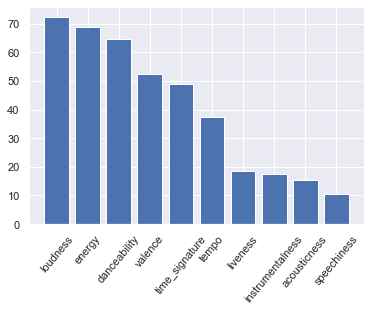

In [35]:
import numpy as np
import matplotlib.pyplot as plt

 
# Choose the names of the bars
y_pos = result.columns
bars = result.loc['mean',:]
 
# Create bars
plt.bar(y_pos, bars)
 
# Create names on the x-axis
plt.xticks(rotation=50)
#plt.xticks(y_pos, bars, color='orange')
#plt.yticks(color='orange')
 
# Show graphic
plt.show()


### barchart2 horizontal - color - features liked song

In [36]:
import plotly.express as px
plt.figure(figsize=(10,7))
fig = px.bar(result.loc['mean',:], x=result.loc['mean',:], y=result.columns,color=result.columns, orientation='h')
#fig = px.bar(result.loc['mean',:], x="mean", y="mean",color=result.columns, orientation='h')

fig.show();

<Figure size 720x504 with 0 Axes>

### wordcloud

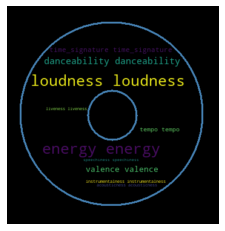

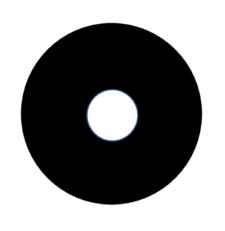

In [37]:
#!/usr/bin/env python
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
d = '/Users/tatiana/ironhack/ML_Prediction_Music/woldcloud/'

# Read the whole text.
text = open(path.join(d, 'liked_songs_features.txt')).read()

#create a list of word thanks to the features in result and their frequencies.
text

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
silhouette_mask = np.array(Image.open(path.join(d, "vinyl_mask_2.png")))

stopwords = set(STOPWORDS)


wc = WordCloud(background_color="black", max_words=13, mask=silhouette_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "vinyl_2.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(silhouette_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

## Kind of music don't liked according to features

In [38]:
df_n

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
1020      0.819000         0.640       227222   0.196          0.000036    4   
1021      0.067700         0.587       180252   0.628          0.000002    1   
1022      0.013000         0.631       187813   0.716          0.000000   10   
1023      0.231000         0.589       194413   0.809          0.000000    3   
1024      0.000907         0.612       227373   0.841          0.000000    9   
...            ...           ...          ...     ...               ...  ...   
2012      0.001060         0.584       274404   0.932          0.002690    1   
2013      0.087700         0.894       182182   0.892          0.001670    1   
2014      0.008570         0.637       207200   0.935          0.003990    0   
2015      0.001640         0.557       185600   0.992          0.677000    1   
2016      0.002810         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
1020    0.0978   -11.478     1       0.0267  143.919             4.0    0.273   
1021    0.1220    -5.703     1       0.0431   92.003             4.0    0.650   
1022    0.0756    -5.713     1       0.0432   88.541             4.0    0.637   
1023    0.0719    -5.292     1       0.0376   88.965             4.0    0.464   
1024    0.3700    -3.795     0       0.0353  104.986             4.0    0.502   
...        ...       ...   ...          ...      ...             ...      ...   
2012    0.1290    -3.501     1       0.3330   74.976             4.0    0.211   
2013    0.0528    -2.663     1       0.1310  110.041             4.0    0.867   
2014    0.2140    -2.467     1       0.1070  150.082             4.0    0.470   
2015    0.0913    -2.735     1       0.1330  150.011             4.0    0.623   
2016    0.2180    -6.221     1       0.1410  190.013             4.0    0.402   

      target  
1020       0  
1021       0  
1022       0  
1023       0  
1024       0  
...      ...  
2012       0  
2013       0  
2014       0  
2015       0  
2016       0  

[997 rows x 14 columns]

### list continuous values in %

In [39]:
#list continuous values in %
df_nviz_cp = df_n.describe().loc[['mean','50%'], ['acousticness','danceability','energy','instrumentalness','speechiness','valence']].mul(100)
df_nviz_cp

acousticness  danceability     energy  instrumentalness  speechiness  \
mean     22.166976     58.964794  67.313831          9.113508     7.865888   
50%       7.930000     59.800000  72.300000          0.000287     4.910000   

        valence  
mean  46.983601  
50%   46.600000

### list of discrete values in %

In [40]:
#list of discrete values
df_nviz_d = df_n.loc[:, ['liveness','time_signature','loudness','tempo']]
df_nviz_d

liveness  time_signature  loudness    tempo
1020    0.0978             4.0   -11.478  143.919
1021    0.1220             4.0    -5.703   92.003
1022    0.0756             4.0    -5.713   88.541
1023    0.0719             4.0    -5.292   88.965
1024    0.3700             4.0    -3.795  104.986
...        ...             ...       ...      ...
2012    0.1290             4.0    -3.501   74.976
2013    0.0528             4.0    -2.663  110.041
2014    0.2140             4.0    -2.467  150.082
2015    0.0913             4.0    -2.735  150.011
2016    0.2180             4.0    -6.221  190.013

[997 rows x 4 columns]

In [41]:
#normalize with MinMaxScaler
X_minmaxdis = MinMaxScaler().fit_transform(df_nviz_d)

In [42]:
#dataframe of features with describe and normalized
df_nviz_d_minmaxdis = pd.DataFrame(data=X_minmaxdis, index=df_nviz_d.index, columns=df_nviz_d.columns)
df_nviz_per = df_nviz_d_minmaxdis.describe().loc[['mean','50%'],:].mul(100)
df_nviz_per

liveness  time_signature   loudness      tempo
mean  18.268451       73.946841  81.353317  46.682243
50%   11.207183       75.000000  85.304859  46.263537

In [43]:
result_no = pd.concat([df_nviz_cp, df_nviz_per], axis=1)


In [44]:
result_no = result_no.sort_values(by='mean', axis=1, ascending=False)
result_no

loudness  time_signature     energy  danceability    valence  \
mean  81.353317       73.946841  67.313831     58.964794  46.983601   
50%   85.304859       75.000000  72.300000     59.800000  46.600000   

          tempo  acousticness   liveness  instrumentalness  speechiness  
mean  46.682243     22.166976  18.268451          9.113508     7.865888  
50%   46.263537      7.930000  11.207183          0.000287     4.910000

## barchart

In [45]:
import plotly.express as px
plt.figure(figsize=(10,7))
fig = px.bar(result_no.loc['mean',:], x=result_no.loc['mean',:], y=result_no.columns,color=result_no.columns, orientation='h')
#fig = px.bar(result.loc['mean',:], x="mean", y="mean",color=result.columns, orientation='h')

fig.show();

<Figure size 720x504 with 0 Axes>

## Correlation all songs

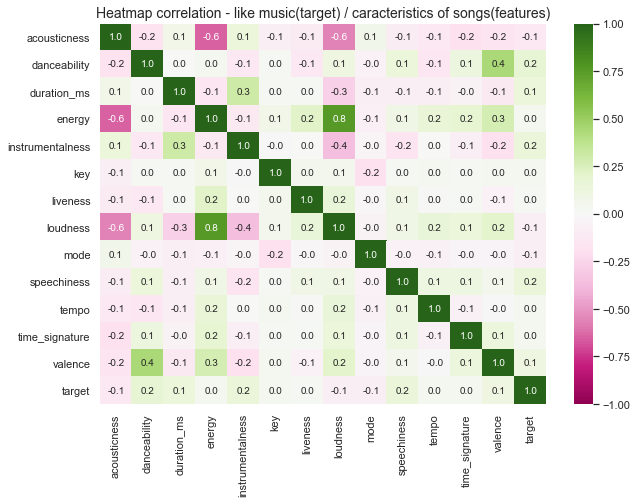

In [46]:
plt.figure(figsize = (10,7))

plt.title("Heatmap correlation - like music(target) / caracteristics of songs(features)", fontsize =14,loc='center')
heatmap_reg = sns.heatmap(df.corr(), cmap="PiYG", robust=True,annot=True,annot_kws={'size':10},fmt=".1f",vmin=-1, vmax=1)
square=True

We don't notice high correlation between our target and the caracteristics of the song.
We notice;
some negative correlation between :
(-0.6) energy and acousticness
(-0.6) loudness/acousticness
positive correlation between (0.8) loudness and energy.

there are multicollinearity between those features.

There are 13 features in the data set.
One target is like (1) or don't like the song (0)

## Visual Analisis

In [47]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(df)

## Pairplot

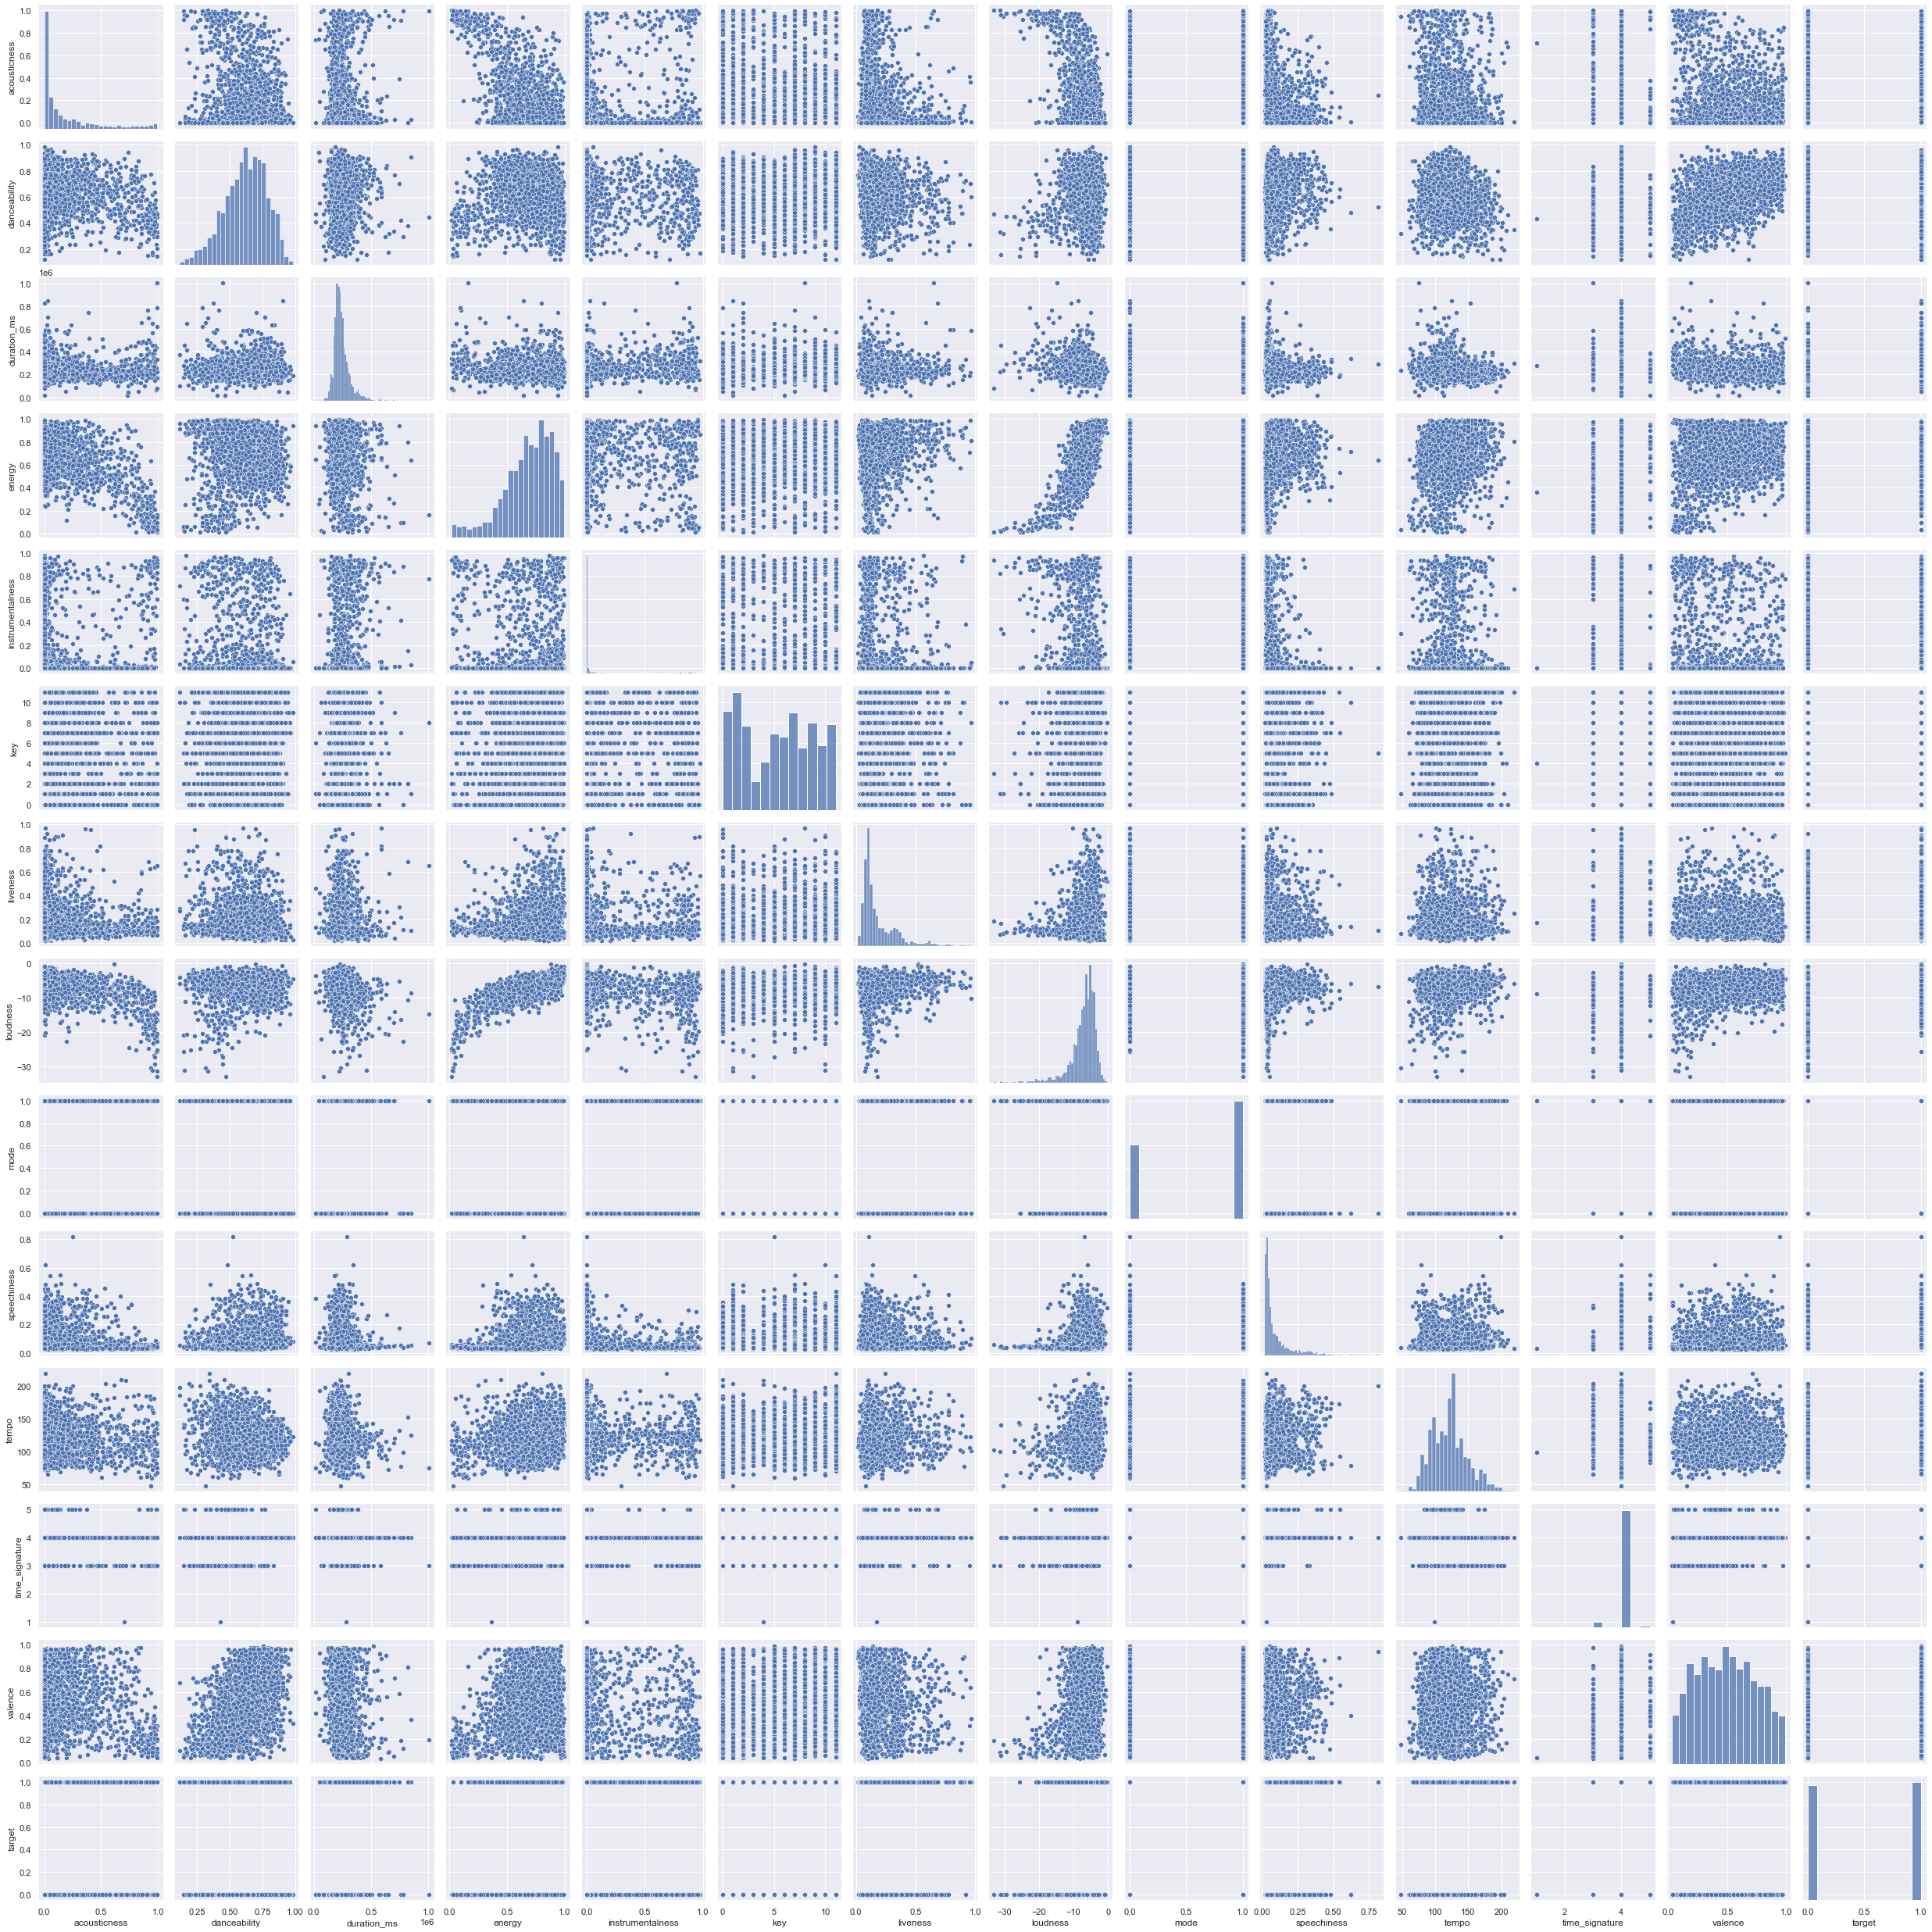

In [48]:
sns.pairplot(df)

## Histogram

<AxesSubplot:>

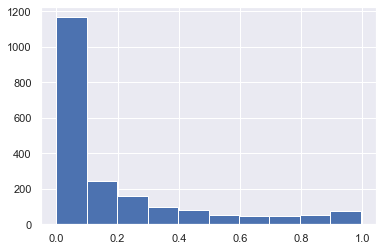

In [49]:
df['acousticness'].hist()

<AxesSubplot:>

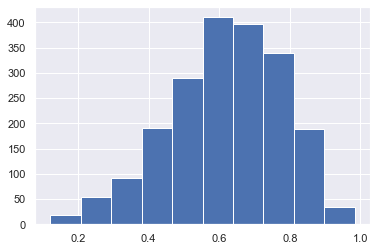

In [50]:
df['danceability'].hist()

<AxesSubplot:>

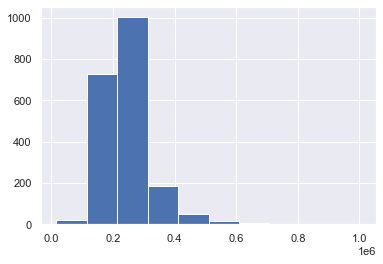

In [111]:
df['duration_ms'].hist()

<AxesSubplot:>

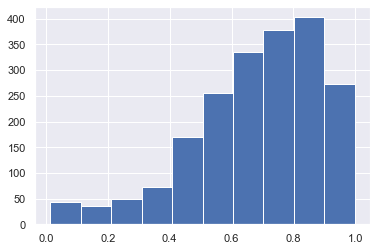

In [112]:
df['energy'].hist()

<AxesSubplot:>

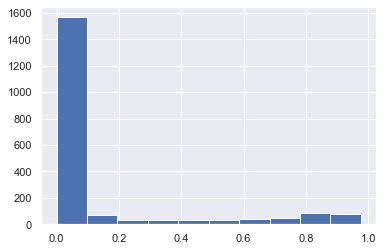

In [113]:
df['instrumentalness'].hist()

<AxesSubplot:>

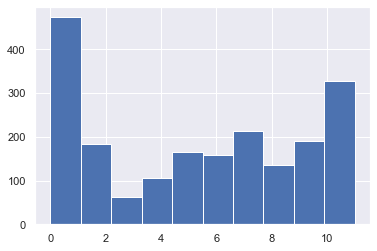

In [114]:
df['key'].hist()

<AxesSubplot:>

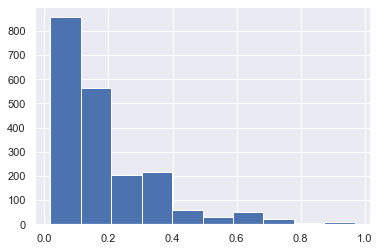

In [115]:
df['liveness'].hist()

<AxesSubplot:>

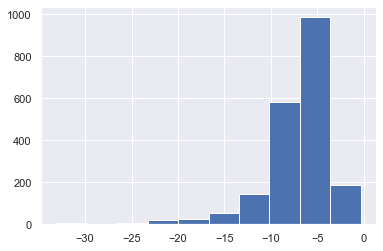

In [116]:
df['loudness'].hist()

<AxesSubplot:>

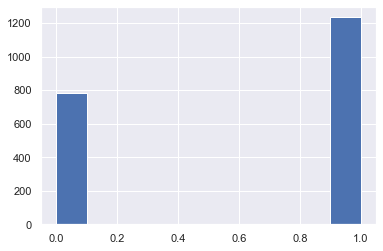

In [117]:
df['mode'].hist()

<AxesSubplot:>

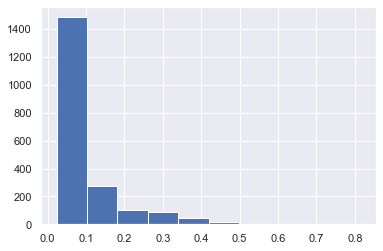

In [118]:
df['speechiness'].hist()

<AxesSubplot:>

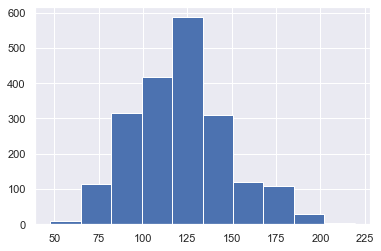

In [119]:
df['tempo'].hist()

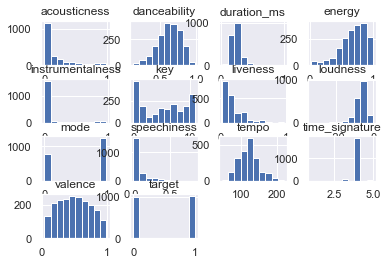

In [120]:
df.hist()
plt.show()

All the features do not more or less look like standard normally distributed data.

## Boxplot

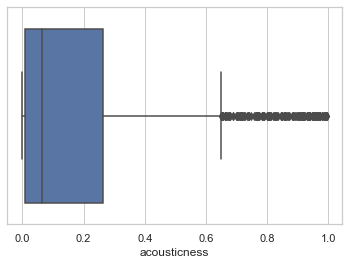

In [156]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["acousticness"])

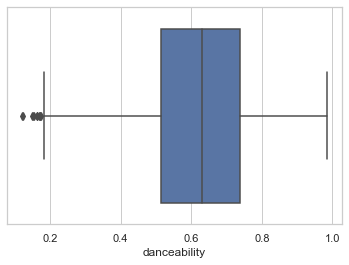

In [157]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["danceability"])

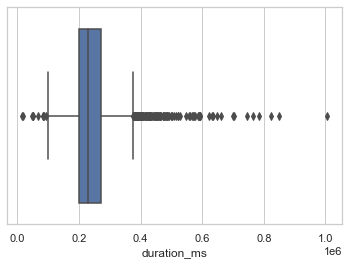

In [158]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["duration_ms"])

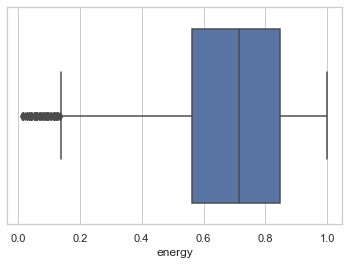

In [159]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["energy"])

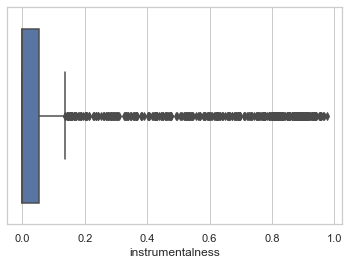

In [160]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["instrumentalness"])

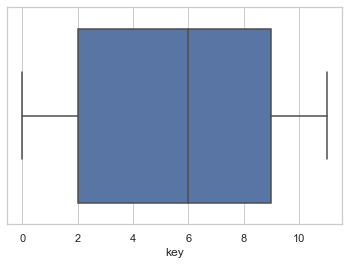

In [161]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["key"])

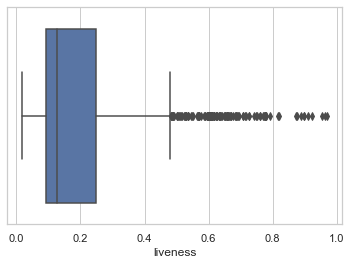

In [162]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["liveness"])

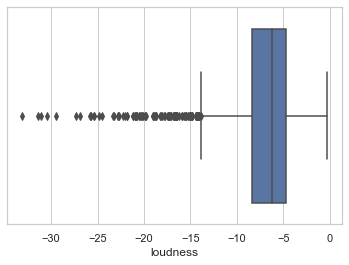

In [163]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["loudness"])

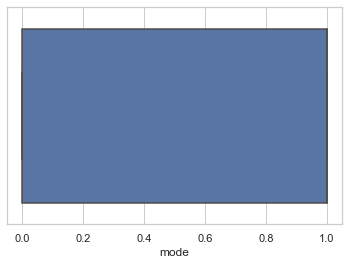

In [164]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["mode"])

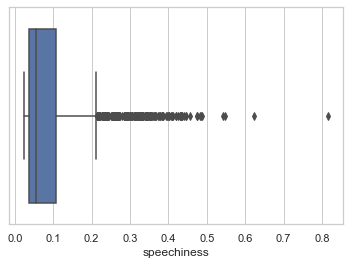

In [165]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["speechiness"])

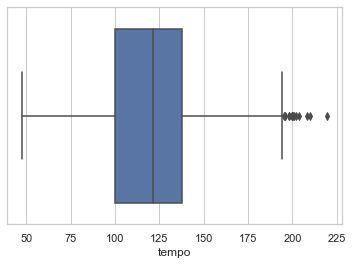

In [166]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["tempo"])

We might think by looking at the boxplots, there are outliers for almost every features in our dataset. In reality, it is about music. And it seems to me quite possible that each song could have its own characteristics. It does not seem relevant to me to see those as outliers and I would be not easy to identify the outliers.

# Test dataframe and Train/Validation dataframe

In [188]:
#Split from the original dataframe :
#20% for the test set 
#80% for the train set and validation set

In [189]:
df_model, df_test, y_model, y_test = train_test_split(df, \
                                        df.target, \
                                        test_size=0.2, \
                                        random_state=42, \
                                        stratify=df.target)

In [190]:
df_model.shape

(1613, 14)

In [191]:
#balance concerning the target in the dataframe will be used for train/validation
df_model.target.value_counts()

1    816
0    797
Name: target, dtype: int64

In [279]:
df_model.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')

The split is well balanced concerning the target in the dataframe will be used for training and validating the model.

In [192]:
df_test.shape

(404, 14)

In [193]:
#balance concerning the target in the dataframe will be used for test
df_test.target.value_counts()

1    204
0    200
Name: target, dtype: int64

The split is well balanced concerning the target in the dataframe will be used for testing the model

In [194]:
numpy_data = np.array([[816,204,1020],[797,200, 997],[1613,404, 2017]])
split = pd.DataFrame(data=numpy_data, index=["Liked", "Dont_liked", "Total"], columns=["Train & Validation", "Test", "Total"])
split

Train & Validation  Test  Total
Liked                      816   204   1020
Dont_liked                 797   200    997
Total                     1613   404   2017

# Functions

In [241]:
def n_components(n, X): #n integer <= number of feature of the df and X the features of the df
    modelpca = PCA(n_components = n)
    Xpca_reduced_n = modelpca.fit_transform(X)
    sum_var = np.cumsum(modelpca.explained_variance_ratio_)
    return sum_var

In [242]:
def model_pca (n, X) : #n integer identify with n_components function and <= number of feature of the df and X the features of the df
    modelpca = PCA(n_components=n)
    Xpca_reduced=modelpca.fit_transform(X)
    return Xpca_reduced

In [353]:
def df_pca (n, Xpca) : # df after using pca
    df_pca = pd.DataFrame(Xpca, columns=['PC'+str(i) for i in range(1,n+1)])
    return df_pca.head(30)

In [358]:
def X2 (X,y):
    X2_score = chi2(X, y)
    return X2_score

In [359]:
def viz_X2(X2_score):
    
    p_values = pd.Series(X2_score[0], index=col_model_features)
    p_values.sort_values(ascending=False, inplace=True)
    
    return p_values.plot.barh()

In [344]:
def StScaler_norm(X): #X features to normalize, int1 and int2 are nb in axis=1
    #get data more normalize with StandardScaler
    X_stdscl = StandardScaler().fit_transform(X)
    return X_stdscl
    
def viz_StScaler(X, int1=0, int2=1):
    #viz
    viz1 = plt.scatter(x=X_stdscl[:, 0],y=X_stdscl[:, 1])#normalized
    viz2 = plt.scatter(Xnumpy[:, 0],Xnumpy[:, 1])#no normalized

    df_stdscl = pd.DataFrame({'X_stdscl': X_stdscl[:, 0]})          
    return viz1, viz2

# Preprocessing

Even if it does not seem obvious to me to have to apply a feature selection in this situation given the small number of features. I will test it and it will allow to compare the results.

## Without normalisation, first feature selection

### Features and target train, validation

In [208]:
X = df_model.drop('target',axis=1)

Xnumpy=X.to_numpy()
Xnumpy

array([[3.44000e-01, 6.90000e-01, 2.37040e+05, ..., 1.15020e+02,
        4.00000e+00, 8.21000e-01],
       [1.65000e-02, 4.43000e-01, 2.23800e+05, ..., 1.51928e+02,
        4.00000e+00, 4.37000e-01],
       [5.99000e-02, 7.56000e-01, 2.57053e+05, ..., 1.00004e+02,
        4.00000e+00, 4.26000e-01],
       ...,
       [8.29000e-02, 7.22000e-01, 1.92026e+05, ..., 1.40031e+02,
        4.00000e+00, 6.06000e-01],
       [1.20000e-03, 6.05000e-01, 2.00787e+05, ..., 1.74974e+02,
        4.00000e+00, 2.20000e-01],
       [2.75000e-01, 7.56000e-01, 2.06378e+05, ..., 1.12140e+02,
        4.00000e+00, 3.07000e-01]])

In [ ]:
#target for 
y_model

### dataframe features model

In [295]:
col_model_features = [ i for i in df_model.columns][:-1]
col_model_features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

### PCA - Feature selection

First for the PCA, we are looking for the best n_components in the dataframe train,validation set : df_model

#### N_components 

In [197]:
modelpca=PCA(n_components=13)#we are looking the value of n_components to apply in the PCA

In [225]:
Xpca_reduced=modelpca.fit_transform(X)

In [199]:
np.cumsum(modelpca.explained_variance_ratio_)# return the cumulative sum of the variance a given axis.

array([0.99999989, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

According to this result, 1 feature can be enough. Let's try with n_components features = 2. We reduce from 13 features to 2 new "features" PCA.

#### PCA model

In [200]:
modelpca=PCA(n_components=2)#at least 2 even 1 is enough here
Xpca_reduced=modelpca.fit_transform(X)

In [201]:
Xpca_reduced

array([[-9.81668428e+03, -7.24498359e+00],
       [-2.30566853e+04,  2.92811839e+01],
       [ 1.01963162e+04, -2.16536277e+01],
       ...,
       [-5.48306849e+04,  1.64150282e+01],
       [-4.60696860e+04,  5.16872809e+01],
       [-4.04786841e+04, -1.11276093e+01]])

#### Dataframe PCA - without normalisation 

In [204]:
df_pca=pd.DataFrame(Xpca_reduced, columns=['PC'+str(i) for i in range(1,3)])
df_pca.head(10)# dataframe of features for train and validation with PCA selection only

PC1        PC2
0   -9816.684276  -7.244984
1  -23056.685302  29.281184
2   10196.316184 -21.653628
3 -153589.685328  26.378052
4   -1363.685799  47.717352
5  -50967.684810  10.582753
6  -33797.684366  -3.043778
7  -50163.686410  66.595297
8   13419.313638  65.471539
9  -24310.685034  20.271323

In [205]:
df_pca.shape # the shape is the one waited.

(1613, 2)

### SELECTKBest - CHI2 - Feature selection 

For using Chi2 we need positive values. Let's use the MinMaxscaller before using Chi2.

## Normalisation first and feature selection

### Normalisation : MINMAXSCALLER (positive values : from 0 to 1)

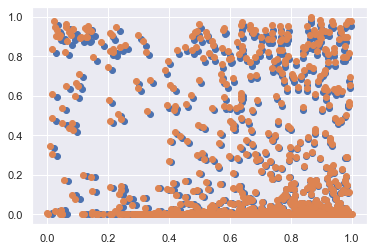

In [221]:
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(Xnumpy[:, 3], Xnumpy[:, 4])
plt.scatter(X_minmax[:, 3], X_minmax[:, 4])

In [296]:
#convert numpy array X_minmax to a df
df_minmax=pd.DataFrame(data=X_minmax, columns=col_model_features)

In [297]:
df_minmax

acousticness  danceability  duration_ms    energy  instrumentalness  \
0         0.345727      0.672189     0.223550  0.734324          0.000000   
1         0.016580      0.379882     0.210157  0.802524          0.000003   
2         0.060198      0.750296     0.243794  0.852402          0.000576   
3         0.008178      0.330178     0.078117  0.973534          0.899590   
4         0.807035      0.579882     0.232100  0.564332          0.000034   
...            ...           ...          ...       ...               ...   
1608      0.104520      0.417751     0.205585  0.920603          0.000000   
1609      0.271355      0.383432     0.246537  0.890065          0.677254   
1610      0.083314      0.710059     0.178016  0.614210          0.000000   
1611      0.001203      0.571598     0.186878  0.920603          0.000611   
1612      0.276380      0.750296     0.192534  0.432003          0.000000   

           key  liveness  loudness  mode  speechiness     tempo  \
0     0.090909  0.235950  0.890909   1.0     0.016648  0.391673   
1     0.909091  0.170701  0.815402   1.0     0.022071  0.606915   
2     0.818182  0.101242  0.832145   0.0     0.037079  0.304102   
3     0.000000  0.382235  0.952616   1.0     0.082608  0.612228   
4     0.090909  0.108609  0.711151   0.0     0.063564  0.711387   
...        ...       ...       ...   ...          ...       ...   
1608  0.454545  0.585350  0.862525   1.0     0.089545  0.624283   
1609  0.636364  0.454852  0.764977   1.0     0.009711  0.712320   
1610  0.818182  0.036308  0.753532   0.0     0.414806  0.537534   
1611  0.363636  0.488529  0.950589   0.0     0.060790  0.741316   
1612  0.090909  0.086508  0.699608   0.0     0.196620  0.374878   

      time_signature   valence  
0               0.75  0.821354  
1               0.75  0.420184  
2               0.75  0.408692  
3               0.75  0.386753  
4               0.75  0.812996  
...              ...       ...  
1608            0.75  0.725240  
1609            0.75  0.489135  
1610            0.75  0.596740  
1611            0.75  0.193481  
1612            0.75  0.284371  

[1613 rows x 13 columns]

#### Visualisation minmaxscaller

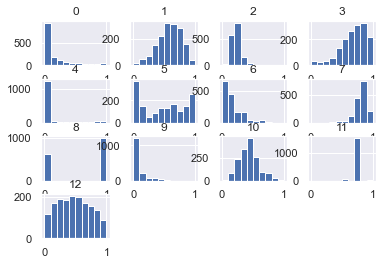

In [219]:
#histogramme of features after minmaxscaller
df_minmax.hist()
plt.show()

#### PCA : Feature selection - minmaxscaller

In [243]:
n_components(n=13, X=X_minmax) #find the best n components for the pca

array([0.33829794, 0.51092089, 0.64746663, 0.75053184, 0.83617862,
       0.88084939, 0.91646005, 0.94372511, 0.96580844, 0.98156306,
       0.98976665, 0.99511312, 1.        ])

The best n components for use the pca is n=12 or 13. Let's test with n=12

In [262]:
Xpca = model_pca (n=12, X=X_minmax)#values of features after using pca
Xpca

array([[-4.50128018e-01, -1.41807427e-01, -3.86104713e-01, ...,
        -8.82088162e-02, -5.96977644e-04,  4.42862842e-02],
       [-2.51366843e-01, -3.26295846e-01,  4.51900604e-01, ...,
        -5.25554513e-02,  1.99261977e-02, -4.03556242e-02],
       [ 6.91024311e-01, -1.70401753e-01,  1.20944793e-01, ...,
        -5.40878220e-02,  4.39807956e-02, -5.49683514e-02],
       ...,
       [ 6.88833660e-01, -1.38391610e-01,  9.79714707e-02, ...,
         2.89836310e-01, -3.80043037e-02, -6.65022978e-03],
       [ 5.97319661e-01, -7.35737218e-02, -2.32878754e-01, ...,
        -1.56532557e-01, -2.66788548e-02, -2.24618800e-02],
       [ 4.62683454e-01,  3.71390327e-01, -4.81585905e-01, ...,
         8.01938016e-02, -4.66481156e-02, -2.81346261e-02]])

In [264]:
df_pca = pd.DataFrame(Xpca, columns=['PC'+str(i) for i in range(1,13)])
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.450128 -0.141807 -0.386105 -0.205900  0.168141  0.185616  0.070963   
1    -0.251367 -0.326296  0.451901  0.084380 -0.192825  0.096473 -0.179532   
2     0.691024 -0.170402  0.120945 -0.044482 -0.085483 -0.198762  0.053058   
3    -0.449779  0.187063 -0.185282  0.855453  0.357484  0.294580 -0.022169   
4     0.458933  0.402082 -0.526323 -0.500927  0.092733  0.403280 -0.195930   
...        ...       ...       ...       ...       ...       ...       ...   
1608 -0.330990 -0.384268 -0.015609  0.106565 -0.021239  0.443303  0.129072   
1609 -0.321372  0.099187  0.369338  0.409107  0.299172  0.401209 -0.007988   
1610  0.688834 -0.138392  0.097971 -0.212491 -0.010870 -0.132197 -0.155807   
1611  0.597320 -0.073574 -0.232879  0.353728 -0.349214  0.115492  0.071073   
1612  0.462683  0.371390 -0.481586 -0.150828 -0.176273 -0.261274  0.029667   

           PC8       PC9      PC10      PC11      PC12  
0    -0.034989 -0.043807 -0.088209 -0.000597  0.044286  
1    -0.001898  0.070808 -0.052555  0.019926 -0.040356  
2    -0.126165 -0.128807 -0.054088  0.043981 -0.054968  
3     0.046442 -0.064706  0.008981 -0.213189  0.022387  
4     0.149182 -0.123998 -0.084212  0.046508 -0.039431  
...        ...       ...       ...       ...       ...  
1608  0.162129  0.100242 -0.049414  0.011294 -0.027602  
1609  0.168210 -0.040246 -0.096474  0.007331 -0.058889  
1610  0.153980  0.001237  0.289836 -0.038004 -0.006650  
1611  0.278519 -0.113776 -0.156533 -0.026679 -0.022462  
1612  0.091362 -0.021463  0.080194 -0.046648 -0.028135  

[1613 rows x 12 columns]

#### Feature selection : Chi2 - minmaxscaller

In [316]:
X2_score = chi2(X_minmax,y)
X2_score

(array([7.69477337e+00, 3.25820059e+00, 7.16838650e-01, 4.60703807e-02,
        1.73734146e+01, 4.25451113e-01, 5.45997324e-02, 2.51131860e-01,
        2.19627120e+00, 5.12443648e+00, 5.18037232e-02, 1.59283031e-02,
        2.59882755e+00]),
 array([5.53809634e-03, 7.10670712e-02, 3.97182851e-01, 8.30047912e-01,
        3.07091508e-05, 5.14229501e-01, 8.15244397e-01, 6.16279225e-01,
        1.38345035e-01, 2.35912296e-02, 8.19953867e-01, 8.99567769e-01,
        1.06942803e-01]))

<AxesSubplot:>

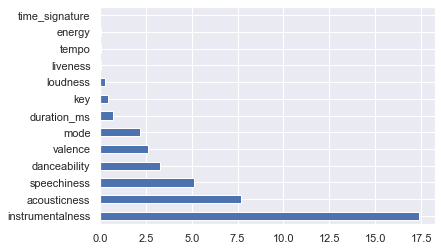

In [310]:
p_values = pd.Series(X2_score[0], index=col_model_features)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.barh()

## Normalisation : StandardScaler

In [361]:
X_stdscl= StScaler_norm(X=X)

### PCA - StandardScaller

In [362]:
n_components(n=13, X=X_stdscl)

array([0.21999966, 0.33969251, 0.4399289 , 0.52410717, 0.60530135,
       0.67929027, 0.74775066, 0.80806733, 0.86561936, 0.91581352,
       0.95757042, 0.98711659, 1.        ])

In [363]:
Xpca = model_pca (n=12, X=X_stdscl)

In [364]:
df_pca (n=12, Xpca=Xpca )

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -0.585590 -1.139526 -0.894238 -1.118918  0.119734 -0.034298  0.325988   
1  -0.728619  1.246266 -0.559389  0.497615  0.727599  0.135855 -0.574677   
2  -0.899111 -0.366965  1.328604  0.080340  0.829291  0.722364 -0.589441   
3  -1.154401  2.453674 -1.603404 -1.132851 -0.317959 -1.514166 -0.154119   
4   1.050432 -0.968854 -0.242549  1.747873  0.186216 -1.182670  0.105112   
5  -1.722676 -0.704778 -1.105674 -0.945575  0.417078 -0.757600  0.255003   
6  -0.333769 -1.037561 -0.260143 -0.250940  0.672129  0.074739 -0.290730   
7  -2.004030  1.324867 -0.561283  1.555466 -2.321214 -0.184685  2.021837   
8  -0.244709  1.714337 -0.084139  3.747244  0.727856  0.387779  3.948721   
9  -1.127092 -0.450049  1.256226  1.312883  1.442593  0.077383 -0.510145   
10  2.268791 -0.267254  2.782701  0.957034  0.752132 -0.569862  0.052278   
11 -1.329469  0.247305 -0.575327 -1.698195 -1.157813  0.839920  1.290016   
12 -1.817349 -0.348123  0.621410  1.188107 -0.868809  0.081719  0.659319   
13 -0.728243  0.755092 -1.127887 -0.381827  0.033833  0.283232 -0.364994   
14  1.830348  2.106195 -0.270852 -1.572965 -0.218653 -2.437636 -0.401760   
15  2.678643 -0.791220 -1.024038  0.965246 -0.011137  0.002120 -0.571366   
16  0.389468  0.715715 -0.503830 -0.761962  0.279826 -0.123368 -0.458946   
17 -1.643391  1.476165 -0.693262  0.854756  0.400263 -0.847819 -0.753892   
18 -0.278373  1.476748 -0.175340 -0.169847 -0.114046  1.635768 -0.294208   
19  0.491000  0.123481 -1.265858  0.384525 -0.276696  1.486938 -1.032280   
20  2.419492 -1.086020 -2.126873  0.692072  1.730435  0.974146  2.615510   
21 -0.191306 -1.049833  0.170243  0.048795  0.892474  0.717902 -0.246408   
22  0.899876 -0.072596 -1.625537  0.415279  0.300020 -0.822673 -0.445909   
23  6.569194  1.149347  1.543882  0.933377  1.367288  1.578553  1.967600   
24 -0.444123 -1.058496 -0.464413 -0.511456  0.616949  0.851459 -0.418029   
25 -0.738898 -0.150048  0.384250 -0.564409  0.983030 -0.005201 -0.161306   
26 -1.690268  0.965204 -0.444944 -0.357389  0.165984  0.528700  0.125077   
27 -0.539577  0.263529 -1.531812 -0.052496  0.596778 -1.135530 -0.374688   
28 -1.220883 -1.169119 -0.232827 -1.651833 -0.288428  0.226631  0.663199   
29 -1.227336  2.161213 -0.150370  0.597513 -0.386319  0.380881 -0.218359   

         PC8       PC9      PC10      PC11      PC12  
0   0.084714  1.162229  0.413957 -0.487814 -0.526803  
1  -1.379513 -0.266056  0.661377 -0.108668  0.404443  
2   0.658012 -0.794902  0.014076  0.249725 -0.255807  
3  -0.318829  1.334669 -2.557641  0.122230 -0.288598  
4   0.765132  2.433248  0.863969 -0.644034 -0.762920  
5  -0.051143  0.797043  0.166570 -0.118446  0.162067  
6  -0.682405 -0.787616  0.257388  1.158055  0.049921  
7  -1.539221  1.084587  0.248175  0.923106  0.396068  
8   0.152248  0.366373 -0.103117 -1.173143 -0.156051  
9  -0.474843  0.601652  0.395040 -0.240213  0.738258  
10 -0.645679  0.623870  0.730478 -0.693719 -1.379996  
11 -0.081398  2.127328  0.442496  0.917253  0.260120  
12  0.843877 -0.356755 -0.494594  1.010529 -0.581737  
13 -0.207350 -0.355459  0.253852  0.152661  0.029389  
14  0.018579 -0.718017 -1.127708  0.154084  0.241679  
15 -0.694912  0.309518  0.667589  0.799647 -0.152605  
16  0.055090 -1.303123  1.308313  0.085115 -0.135294  
17  1.410363 -0.192595  0.003182 -0.571373 -0.073636  
18 -1.136953 -0.421036  0.475850  1.435065 -0.159397  
19 -0.281893 -1.329518 -0.538949 -0.096351  0.133494  
20  0.656189 -0.010581 -0.710001 -0.001789 -0.039299  
21 -1.537674  0.474394  0.396104 -0.652301  0.405992  
22 -0.148099  0.437404  0.870282  0.210291 -0.340575  
23  0.647733 -0.129373 -1.818711 -0.552817  0.448856  
24 -0.679118 -0.002896 -0.104606  0.185401  0.171628  
25 -1.093458 -0.514518  1.018622 -0.756203  0.270253  
26 -1.060325  0.367915  0.236056  0.587605 -0.026438  
27 -0.161891  0.233664  0.686377  0.032271  0.249947  
28 -0.015115  0.608449 -0.034815 -0.315339  0.534878  
29

In [ ]:
Normalisation

## Split the data set one for train and the other for the test

As the values of my features are dispersed, I take a large amount of data to make the prediction : 90% so I leave 10% of the dataset to make the prediction.

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(df.drop('target',axis=1), \
                                                  df.target, \
                                                  test_size=0.1, \
                                                  random_state=42, \
                                                  stratify=df.target)#test with statrify with df.target

## Decision Tree

In [22]:
model1=DecisionTreeClassifier()

model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)

conf1=confusion_matrix(y_test, y_pred1)#Compute confusion matrix to evaluate the accuracy of a classification.
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)

print('Accuracy', acc1)#% of True positive
print('Recall', rec1)#min False Negative
print('Precision', pre1)#min False Positive
print('F1', f11)# 2*(Precision*Recall/Precision+Recall)

array([[68, 32],
       [29, 73]])

Accuracy 0.698019801980198
Recall 0.7156862745098039
Precision 0.6952380952380952
F1 0.7053140096618358


## Random Forest

For the random forest we need to normalize the values in the columns

In [23]:
model1=RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[82, 18],
       [30, 72]])

Accuracy 0.7623762376237624
Recall 0.7058823529411765
Precision 0.8
F1 0.7500000000000001


## Random Forest balanced

In [24]:
model1=RandomForestClassifier(class_weight='balanced')
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[80, 20],
       [30, 72]])

Accuracy 0.7524752475247525
Recall 0.7058823529411765
Precision 0.782608695652174
F1 0.7422680412371134


## XGBoost

In [25]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[84, 16],
       [32, 70]])

Accuracy 0.7623762376237624
Recall 0.6862745098039216
Precision 0.813953488372093
F1 0.7446808510638299


## AdaBoost

In [26]:
model1=AdaBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[74, 26],
       [29, 73]])

Accuracy 0.7277227722772277
Recall 0.7156862745098039
Precision 0.7373737373737373
F1 0.72636815920398


## CatBoost

In [27]:
model1=CatBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, [eval(i) for i in y_pred1])
acc1=accuracy_score(y_test, [eval(i) for i in y_pred1])
rec1=recall_score(y_test, [eval(i) for i in y_pred1])
pre1=precision_score(y_test, [eval(i) for i in y_pred1])
f11=f1_score(y_test, [eval(i) for i in y_pred1])
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

Learning rate set to 0.013288
0:	learn: 0.6892559	total: 59.8ms	remaining: 59.7s
1:	learn: 0.6856370	total: 65.3ms	remaining: 32.6s
2:	learn: 0.6824485	total: 70ms	remaining: 23.2s
3:	learn: 0.6782847	total: 74.3ms	remaining: 18.5s
4:	learn: 0.6743167	total: 80.2ms	remaining: 16s
5:	learn: 0.6703219	total: 89.4ms	remaining: 14.8s
6:	learn: 0.6661944	total: 98.2ms	remaining: 13.9s
7:	learn: 0.6628036	total: 107ms	remaining: 13.3s
8:	learn: 0.6593437	total: 115ms	remaining: 12.6s
9:	learn: 0.6563868	total: 125ms	remaining: 12.3s
10:	learn: 0.6533243	total: 133ms	remaining: 11.9s
11:	learn: 0.6496453	total: 144ms	remaining: 11.8s
12:	learn: 0.6464522	total: 155ms	remaining: 11.8s
13:	learn: 0.6431615	total: 165ms	remaining: 11.6s
14:	learn: 0.6403264	total: 172ms	remaining: 11.3s
15:	learn: 0.6372620	total: 180ms	remaining: 11s
16:	learn: 0.6343104	total: 187ms	remaining: 10.8s
17:	learn: 0.6316488	total: 196ms	remaining: 10.7s
18:	learn: 0.6293430	total: 203ms	remaining: 10.5s
19:	learn:

176:	learn: 0.4505127	total: 1.34s	remaining: 6.25s
177:	learn: 0.4499231	total: 1.35s	remaining: 6.24s
178:	learn: 0.4495610	total: 1.36s	remaining: 6.22s
179:	learn: 0.4490274	total: 1.36s	remaining: 6.21s
180:	learn: 0.4483611	total: 1.37s	remaining: 6.2s
181:	learn: 0.4479275	total: 1.37s	remaining: 6.18s
182:	learn: 0.4474647	total: 1.38s	remaining: 6.16s
183:	learn: 0.4470607	total: 1.39s	remaining: 6.15s
184:	learn: 0.4465214	total: 1.4s	remaining: 6.15s
185:	learn: 0.4460546	total: 1.4s	remaining: 6.14s
186:	learn: 0.4454121	total: 1.41s	remaining: 6.13s
187:	learn: 0.4449819	total: 1.41s	remaining: 6.11s
188:	learn: 0.4443754	total: 1.42s	remaining: 6.1s
189:	learn: 0.4437096	total: 1.43s	remaining: 6.09s
190:	learn: 0.4432307	total: 1.43s	remaining: 6.06s
191:	learn: 0.4428251	total: 1.44s	remaining: 6.05s
192:	learn: 0.4424014	total: 1.44s	remaining: 6.04s
193:	learn: 0.4419111	total: 1.45s	remaining: 6.04s
194:	learn: 0.4413791	total: 1.46s	remaining: 6.03s
195:	learn: 0.44

356:	learn: 0.3757360	total: 2.49s	remaining: 4.49s
357:	learn: 0.3754153	total: 2.5s	remaining: 4.48s
358:	learn: 0.3751055	total: 2.51s	remaining: 4.47s
359:	learn: 0.3748665	total: 2.51s	remaining: 4.46s
360:	learn: 0.3746653	total: 2.52s	remaining: 4.46s
361:	learn: 0.3743412	total: 2.52s	remaining: 4.45s
362:	learn: 0.3740776	total: 2.53s	remaining: 4.45s
363:	learn: 0.3738135	total: 2.54s	remaining: 4.44s
364:	learn: 0.3733819	total: 2.54s	remaining: 4.43s
365:	learn: 0.3730303	total: 2.55s	remaining: 4.42s
366:	learn: 0.3727867	total: 2.56s	remaining: 4.41s
367:	learn: 0.3725282	total: 2.56s	remaining: 4.4s
368:	learn: 0.3721979	total: 2.57s	remaining: 4.39s
369:	learn: 0.3718094	total: 2.57s	remaining: 4.38s
370:	learn: 0.3713563	total: 2.58s	remaining: 4.37s
371:	learn: 0.3709806	total: 2.58s	remaining: 4.36s
372:	learn: 0.3707825	total: 2.59s	remaining: 4.35s
373:	learn: 0.3704963	total: 2.6s	remaining: 4.34s
374:	learn: 0.3702085	total: 2.6s	remaining: 4.34s
375:	learn: 0.37

529:	learn: 0.3258923	total: 3.64s	remaining: 3.23s
530:	learn: 0.3256403	total: 3.65s	remaining: 3.22s
531:	learn: 0.3252878	total: 3.65s	remaining: 3.21s
532:	learn: 0.3250616	total: 3.66s	remaining: 3.21s
533:	learn: 0.3247061	total: 3.67s	remaining: 3.2s
534:	learn: 0.3245170	total: 3.68s	remaining: 3.19s
535:	learn: 0.3242480	total: 3.69s	remaining: 3.19s
536:	learn: 0.3239025	total: 3.69s	remaining: 3.18s
537:	learn: 0.3237748	total: 3.7s	remaining: 3.17s
538:	learn: 0.3234667	total: 3.7s	remaining: 3.17s
539:	learn: 0.3231777	total: 3.71s	remaining: 3.16s
540:	learn: 0.3228918	total: 3.72s	remaining: 3.15s
541:	learn: 0.3226783	total: 3.72s	remaining: 3.15s
542:	learn: 0.3224785	total: 3.73s	remaining: 3.14s
543:	learn: 0.3221758	total: 3.73s	remaining: 3.13s
544:	learn: 0.3218044	total: 3.74s	remaining: 3.12s
545:	learn: 0.3215674	total: 3.74s	remaining: 3.11s
546:	learn: 0.3212144	total: 3.75s	remaining: 3.1s
547:	learn: 0.3210062	total: 3.75s	remaining: 3.1s
548:	learn: 0.320

700:	learn: 0.2816916	total: 4.78s	remaining: 2.04s
701:	learn: 0.2815786	total: 4.79s	remaining: 2.03s
702:	learn: 0.2813582	total: 4.79s	remaining: 2.02s
703:	learn: 0.2811570	total: 4.8s	remaining: 2.02s
704:	learn: 0.2808793	total: 4.81s	remaining: 2.01s
705:	learn: 0.2806699	total: 4.82s	remaining: 2.01s
706:	learn: 0.2805516	total: 4.83s	remaining: 2s
707:	learn: 0.2803439	total: 4.83s	remaining: 1.99s
708:	learn: 0.2801731	total: 4.84s	remaining: 1.99s
709:	learn: 0.2799949	total: 4.85s	remaining: 1.98s
710:	learn: 0.2796718	total: 4.85s	remaining: 1.97s
711:	learn: 0.2794129	total: 4.86s	remaining: 1.97s
712:	learn: 0.2790958	total: 4.87s	remaining: 1.96s
713:	learn: 0.2788229	total: 4.88s	remaining: 1.95s
714:	learn: 0.2784645	total: 4.89s	remaining: 1.95s
715:	learn: 0.2782494	total: 4.89s	remaining: 1.94s
716:	learn: 0.2779215	total: 4.9s	remaining: 1.94s
717:	learn: 0.2777172	total: 4.91s	remaining: 1.93s
718:	learn: 0.2775011	total: 4.92s	remaining: 1.92s
719:	learn: 0.277

886:	learn: 0.2406146	total: 6.13s	remaining: 780ms
887:	learn: 0.2402594	total: 6.13s	remaining: 774ms
888:	learn: 0.2400829	total: 6.14s	remaining: 767ms
889:	learn: 0.2400024	total: 6.15s	remaining: 760ms
890:	learn: 0.2398180	total: 6.15s	remaining: 753ms
891:	learn: 0.2395318	total: 6.16s	remaining: 746ms
892:	learn: 0.2393504	total: 6.17s	remaining: 739ms
893:	learn: 0.2391952	total: 6.17s	remaining: 732ms
894:	learn: 0.2389811	total: 6.18s	remaining: 725ms
895:	learn: 0.2387535	total: 6.18s	remaining: 718ms
896:	learn: 0.2386221	total: 6.19s	remaining: 711ms
897:	learn: 0.2384211	total: 6.2s	remaining: 704ms
898:	learn: 0.2381444	total: 6.21s	remaining: 698ms
899:	learn: 0.2378579	total: 6.22s	remaining: 691ms
900:	learn: 0.2376857	total: 6.23s	remaining: 684ms
901:	learn: 0.2374484	total: 6.24s	remaining: 678ms
902:	learn: 0.2372921	total: 6.25s	remaining: 671ms
903:	learn: 0.2371165	total: 6.25s	remaining: 664ms
904:	learn: 0.2370587	total: 6.26s	remaining: 657ms
905:	learn: 0

ValueError: source code string cannot contain null bytes

## KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(5)
knn.fit(X_train, y_train)
y_pred1=knn.predict(X_test)
display(confusion_matrix(y_pred1, y_test))
display(accuracy_score(y_pred1, y_test))

## LogisticRegression

In [ ]:
# no linear regression in our case

In [ ]:
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred2=lr.predict(X_test)
display(confusion_matrix(y_pred2, y_test))
display(accuracy_score(y_pred2, y_test))

## SVC

In [ ]:
sv=SVC()
sv.fit(X_train, y_train)
y_pred3=sv.predict(X_test)
display(confusion_matrix(y_pred3, y_test))
display(accuracy_score(y_pred3, y_test))

## Gaussian

In [ ]:
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred4=nb.predict(X_test)
display(confusion_matrix(y_pred4, y_test))
display(accuracy_score(y_pred4, y_test))

In this context, by comparing the accuracy results of each model, it would seem that XGBoost brings us the best true positive rate. In other words, it seems that it is able to offer us with a 76% success rate a song that the user will like knowing the features of a song.

# PCA

PCA is used to reduce the superfluous complexity of the dataset (reduce the dimensions, reducing number of features) in order to speed up the learning of the machine.

## import librairy

In [28]:
from sklearn.decomposition import PCA

## n_components

In [29]:
X1=df.drop('target',axis=1)

In [30]:
X1.shape

(2017, 13)

In [31]:
modelpca=PCA(n_components=1)#we are looking the value of n_components to apply in the PCA

In [32]:
Xpca_reduced=modelpca.fit_transform(X1)

In [33]:
np.cumsum(modelpca.explained_variance_ratio_)# return the cumulative sum of the variance a given axis.

array([0.99999989])

keeping 1 in n_component (built thanks to the other features), the variance is 99%.

## Model PCA

In [43]:
modelpca=PCA(n_components=2)#at least 2 even 1 is enough here
Xpca_reduced=modelpca.fit_transform(X1)

## XGB with PCA

In [44]:
X_train, X_test,y_train,y_test = train_test_split(Xpca_reduced, \
                                                  df.target, \
                                                  test_size=0.1, \
                                                  random_state=42, \
                                                  stratify=df.target)#test with statrify with df.target

In [45]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[63, 37],
       [40, 62]])

Accuracy 0.6188118811881188
Recall 0.6078431372549019
Precision 0.6262626262626263
F1 0.6169154228855721


The accuracy using only XGB is around 76%
The accuracy using XGB with PCA is around 59%

By using the XGB algorithm, the number of songs offered to the user that he will like will be higher than in the case of the XGB PCA model.
On the other hand, the processing of the algorithm in the last case will be faster, and probably also less expensive.

My assumption is:
En tant qu'utilisateur, je préférerai la recommandation de chansons à partir d'un algorithme XGB. En tant que société, dans ce cas, Spotify, je préférerai le modèle XGB et PCA.


# Preprocessing

This is probably the step I should have started with

During the manipulating step, we notice that some of features could be scaled like Tempo, duration, time-signature and key.

For scaled those feature, we are going to use the standarscaler. This preprocessing is sensitive to the outliers. 

Xscaled=(X-muX)/sigmaX (muX is the initial mean of X, sigmaX is the standard deviation of X)

## import library

In [46]:
from sklearn.preprocessing import StandardScaler

## pre-processing with StandardScaller

In [47]:
Xall=df.drop('target',axis=1)
Xall

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0       0.1650    -8.795     1       0.4310  150.062             4.0    0.286  
1       0.1370   -10.401     1       0.0794  160.083             4.0    0.588  
2       0.1590    -7.148     1       0.2890   75.044             4.0    0.173  
3       0.0922   -15.236     1       0.0261   86.468             4.0    0.230  
4       0.4390   -11.648     0       0.0694  174.004             4.0    0.904  
...        ...       ...   ...          ...      ...             ...      ...  
2012    0.1290    -3.501     1       0.3330   74.976             4.0    0.211  
2013    0.0528    -2.663     1       0.1310  110.041             4.0    0.867  
2014    0.2140    -2.467     1       0.1070  150.082             4.0    0.470  
2015    0.0913    -2.735     1       0.1330  150.011             4.0    0.623  
2016    0.2180    -6.221     1       0.1410  190.013             4.0    0.402  

[2017 rows x 13 columns]

In [48]:
scaller=StandardScaler()

In [49]:
Featpp = scaller.fit_transform(Xall)#prepro with all the features

## StandardScaller all the features and XGB

In [41]:
X_train, X_test,y_train,y_test = train_test_split(Featpp, \
                                                  df.target, \
                                                  test_size=0.1, \
                                                  random_state=42, \
                                                  stratify=df.target)#test with statrify with df.target

In [42]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[84, 16],
       [32, 70]])

Accuracy 0.7623762376237624
Recall 0.6862745098039216
Precision 0.813953488372093
F1 0.7446808510638299


The accuracy using only XGB is around 76% The accuracy using XGB with StandardScalling is always 76%